In [16]:
# Import packages
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=1000)
curDay = 18

# Download input file
from download_inputs import download_inputs


from tqdm import tqdm


import os

filename = f'inputs\\day{curDay}.txt'
if not os.path.exists(filename):
    download_inputs(curDay)
else:
    print('Inputs already downloaded')

Inputs already downloaded


In [17]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'

inputFile = open(filename)
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

Done loading input


In [18]:
# Load test-input into workspace
filenameTest = f'inputs\\day{curDay}_test.txt'

inputFileTest = open(filenameTest)
inputsTest = [s for s in inputFileTest.read().splitlines()]

print('Done loading test-input') 

Done loading test-input


# Input parsing

In [19]:
def parseInputs(test=False):
    if test:
        curIn = inputsTest 
    else:
        curIn = inputs 

    dirs = []
    dists = []
    cols = []
    for li in curIn:
        dir,dist,col = li.split()
        dirs.append(dir)
        dists.append(dist)
        cols.append(col)

    dists = [int(x) for x in dists]
    return dirs,dists,cols

In [20]:
isTesting = True 
isTesting = False
dirs,dists,cols = parseInputs(test=isTesting)
# dirs,dists,cols = parseInputs(test=False)


# Part 1

In [21]:
curSize = 600
iniX = 100
iniY = 300
if isTesting:
    curSize = 20
    iniX = 0
    iniY = 0

ter = np.zeros((curSize,curSize))


curX = iniX 
curY = iniY

for i in range(len(dirs)):
    dir = dirs[i]
    dist = dists[i]
    
    for j in range(dist):
        

        if dir == 'U':
            curY -= 1
        elif dir == 'D':
            curY += 1 
        elif dir == 'R':
            curX += 1
        elif dir == 'L':
            curX -= 1
        else:
            print('Error')
        ter[curY,curX] = 1


In [22]:
terBorder = ter.copy()

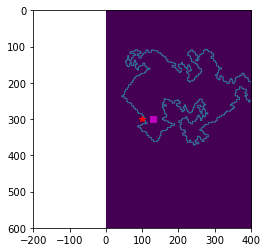

In [23]:
import matplotlib.pyplot as plt
# %matplotlib widget
fig,ax = plt.subplots()
ax.imshow(ter,origin='upper')
ax.plot(iniX,iniY,'r*')

ax.set_ylim([iniY-300,iniY+300])
ax.set_xlim([iniX-300,iniX+300])

floodIniX = iniX + 30
floodIniY = iniY + 1


ax.plot(floodIniX,floodIniY,'sm')


ax.invert_yaxis()

1 1


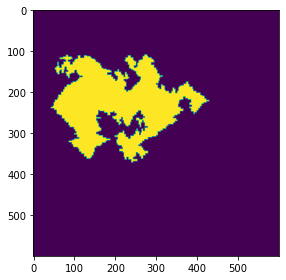

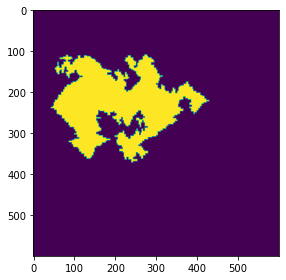

In [31]:
# floodIniX = iniX + 3
# floodIniY = iniY + 3

# ax.plot(floodIniX,floodIniY,'.m')
# ter[floodIniX,floodIniY ] = 2

curStack = []
curStack.append((floodIniY,floodIniX))

i = 0
# curEle = curStack[0]

while len(curStack) > 0:
    i+= 1

    if (i%100000) == 1:
        print(i,len(curStack))
        
        fig,ax = plt.subplots()
        ax.imshow(ter,origin='upper')
        fig.tight_layout()
        plt.pause(0.05)

    
    curEle = curStack.pop(0)
    # print()
    ter[curEle[0],curEle[1]] = 2
    if (ter[curEle[0]-1,curEle[1]]) == 0:
        toAdd = (curEle[0]-1,curEle[1])
        if toAdd not in curStack:
            curStack.append(toAdd)
    if (ter[curEle[0]+1,curEle[1]]) == 0:
        toAdd = (curEle[0]+1,curEle[1])
        if toAdd not in curStack:
            curStack.append(toAdd)
    if (ter[curEle[0],curEle[1]-1]) == 0:
        toAdd = (curEle[0],curEle[1]-1)
        if toAdd not in curStack:
            curStack.append(toAdd)
    if (ter[curEle[0],curEle[1]+1]) == 0:
        toAdd = (curEle[0],curEle[1]+1)
        if toAdd not in curStack:
            curStack.append(toAdd)

    # curStack = list(np.unique(curStack,axis=0))
    # if i > 1000:
    #     # curStack  = []
    #     break
            

fig,ax = plt.subplots()
ax.imshow(ter,origin='upper')
fig.tight_layout()
# plt.pause(0.05)


In [25]:
# len(np.unique(curStack,axis=0))
# curEle in curStack

In [30]:
sol1 = (ter > 0).sum()
print(f'{sol1 = }')

sol1 = 49578


# Part 2

In [41]:
# def parseInputs2(test=False):
#     if test:
#         curIn = inputsTest 
#     else:
#         curIn = inputs 

#     dirs = []
#     dists = []
#     cols = []
#     for li in curIn:
#         dir,dist,col = li.split()
#         dirs.append(dir)
#         dists.append(dist)
#         cols.append(col)

#     dists = [int(x) for x in dists]
#     return dirs,dists,cols

In [44]:
numToDir = {
    0:'R',
    1:'D',
    2:'L',
    3:'U',
}

In [47]:
isTesting = True
dirs,dists,cols = parseInputs(test=isTesting)

In [53]:
dirs2 = [numToDir[int(x[-2])] for x in cols]
dists2Hex = [x[2:-2] for x in cols]
dists2Hex
dirs2
dists2 = [int(x,16) for x in dists2Hex]

In [59]:
print(dirs2 )
print(dists2)

['R', 'D', 'R', 'D', 'R', 'D', 'L', 'U', 'L', 'D', 'L', 'U', 'L', 'U']
[461937, 56407, 356671, 863240, 367720, 266681, 577262, 829975, 112010, 829975, 491645, 686074, 5411, 500254]


In [56]:
# curSize = 600
# iniX = 100
# iniY = 300
# if isTesting:
#     curSize = 20
#     iniX = 0
#     iniY = 0

# ter = np.zeros((curSize,curSize))


# curX = iniX 
# curY = iniY

# for i in range(len(dirs2)):
#     dir = dirs2[i]
#     dist = dists2[i]
    
#     for j in range(dist):
        

#         if dir == 'U':
#             curY -= 1
#         elif dir == 'D':
#             curY += 1 
#         elif dir == 'R':
#             curX += 1
#         elif dir == 'L':
#             curX -= 1
#         else:
#             print('Error')
#         ter[curY,curX] = 1
